# Example: Using `HelmholtzDecomposition` for Analytical Function

This notebook demonstrates the use of the `HelmholtzDecomposition` class from the provided script to compute the rotational and divergent components of an analytical velocity field.

In [111]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from ADCPySpec.spectrum import SpectrumProcessor
from ADCPySpec.helmholtz import HelmholtzDecomposition

## Define Analytical Inputs

In [115]:
# Define an example velocity field
time = np.linspace(0,120)
u = np.sin(time)
v = np.cos(time)

## Compute Spectrum

In [116]:
spectrum = SpectrumProcessor(time,u,v,pad=False)
freq, Cuv, Cu, Cv,_,_,_,_,_ = spectrum.compute_cross_spectrum()

## Perform Decomposition

In [135]:
# Compute rotational and divergent components
helmholtz = HelmholtzDecomposition(freq,Cu,Cv,Cuv,u,v)
Cpsi_u,Cphi_u,Cpsi_v,Cphi_v,Cpsi_uv,Cphi_uv = helmholtz.model3_decomposition()

/opt/miniconda3/envs/calypso/lib/python3.13/site-packages/ADCPySpec/helmholtz.py:152: ComplexWarning: Casting complex values to real discards the imaginary part
  Kpsi[i] = .5 * (Cv[i] + (1/s[i]) * integrate.simpson(K,x=s[i:]))
/opt/miniconda3/envs/calypso/lib/python3.13/site-packages/ADCPySpec/helmholtz.py:153: ComplexWarning: Casting complex values to real discards the imaginary part
  Kphi[i] = .5 * (Cu[i] - (1/s[i]) * integrate.simpson(K,x=s[i:]))
/opt/miniconda3/envs/calypso/lib/python3.13/site-packages/ADCPySpec/helmholtz.py:152: RuntimeWarning: divide by zero encountered in scalar divide
  Kpsi[i] = .5 * (Cv[i] + (1/s[i]) * integrate.simpson(K,x=s[i:]))
/opt/miniconda3/envs/calypso/lib/python3.13/site-packages/ADCPySpec/helmholtz.py:152: RuntimeWarning: invalid value encountered in scalar multiply
  Kpsi[i] = .5 * (Cv[i] + (1/s[i]) * integrate.simpson(K,x=s[i:]))
/opt/miniconda3/envs/calypso/lib/python3.13/site-packages/ADCPySpec/helmholtz.py:153: RuntimeWarning: divide by zero 

## Visualize the Results

<>:3: SyntaxWarning: invalid escape sequence '\h'
<>:4: SyntaxWarning: invalid escape sequence '\h'
<>:5: SyntaxWarning: invalid escape sequence '\h'
<>:6: SyntaxWarning: invalid escape sequence '\h'
<>:7: SyntaxWarning: invalid escape sequence '\h'
<>:8: SyntaxWarning: invalid escape sequence '\h'
<>:3: SyntaxWarning: invalid escape sequence '\h'
<>:4: SyntaxWarning: invalid escape sequence '\h'
<>:5: SyntaxWarning: invalid escape sequence '\h'
<>:6: SyntaxWarning: invalid escape sequence '\h'
<>:7: SyntaxWarning: invalid escape sequence '\h'
<>:8: SyntaxWarning: invalid escape sequence '\h'
/var/folders/ms/8hpcnj2j01zd81g0v_5l2ttw0000gn/T/ipykernel_12769/561754865.py:3: SyntaxWarning: invalid escape sequence '\h'
  plt.loglog(freq, Cu, label='$\hat C^u$',lw=4,alpha=.2,c="r")
/var/folders/ms/8hpcnj2j01zd81g0v_5l2ttw0000gn/T/ipykernel_12769/561754865.py:4: SyntaxWarning: invalid escape sequence '\h'
  plt.plot(freq, Cv, lw=4, alpha=.2, label='$\hat C^v$',c="b")
/var/folders/ms/8hpcnj2j

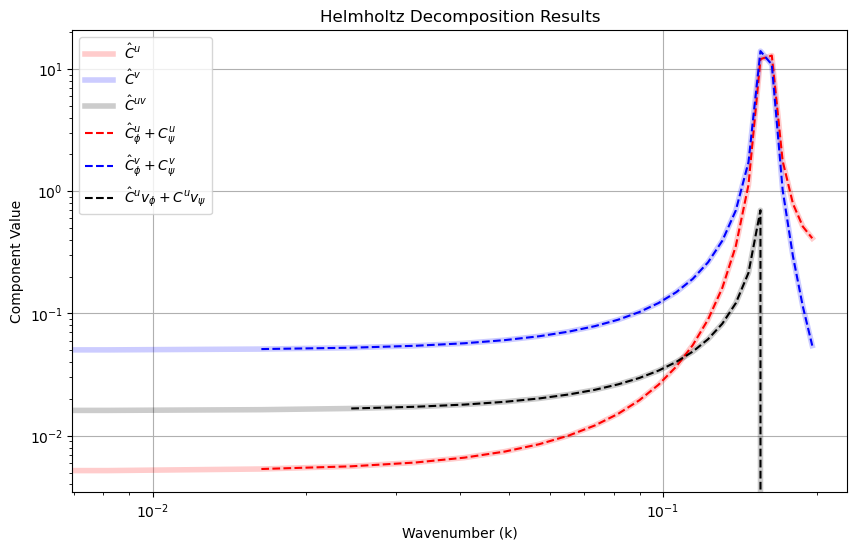

In [137]:
# Plot the components
plt.figure(figsize=(10, 6))
plt.loglog(freq, Cu, label='$\hat C^u$',lw=4,alpha=.2,c="r")
plt.plot(freq, Cv, lw=4, alpha=.2, label='$\hat C^v$',c="b")
plt.loglog(freq, Cuv, lw=4, alpha=.2, c="k", label='$\hat C^{uv}$')
plt.plot(freq, Cpsi_u+Cphi_u,ls="--",c="r",label='$\hat C^u_\phi + C^u_\psi$')
plt.plot(freq, Cpsi_v+Cphi_v, ls="--", c="b", label='$\hat C^v_\phi + C^v_\psi$')
plt.plot(freq, Cpsi_uv+Cphi_uv, ls="--", c="k", label='$\hat C^uv_\phi + C^uv_\psi$')
plt.xlabel('Wavenumber (k)')
plt.ylabel('Component Value')
plt.legend()
plt.title('Helmholtz Decomposition Results')
plt.grid()
plt.show()